# Parte 2: DCCaracteres

Luego de permanecer tanto tiempo trabajando en la salud, te das cuenta de que un problema serio es
que nadie puede entender la letra de las/os doctores. Inspirado por tu reciente éxito en la prediccion de
la diabetes, decides usar tus habilidades en SVM para crear un sistema capaz de interpretar la jeroglífica
letra de estos profesionales.

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

random_state = 19625375

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IA/caracteres.csv") # Aquí debes leer el archivo .csv entregado
df.head()

,Unnamed: 0,label,1,2,3,4,5,6,7,8,...,775,776,777,778,779,780,781,782,783,784
0,3,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,Q,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,7,W,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,K,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Actividad 1: Análisis preliminar de los datos 

- 2.1 Verifica cuales son las diferentes categorías que existen y el balance entre estas. 

In [ ]:
df.groupby(df["label"]).count()["1"]

label
0    2409
1    2418
2    2417
3    2410
4    2414
5    2417
6    2414
7    2409
8    2413
9    2415
A    2417
B    2417
C    2414
D    2409
E    2409
F    2413
G    2416
H    2413
I    2414
J    2408
K    2413
L    2415
M    2407
N    2415
O    2414
P    2416
Q    2415
R    2410
S    2413
T    2417
U    2411
V    2407
W    2408
X    2417
Y    2410
Z    2410
Name: 1, dtype: int64

- 2.2 Indica las ventajas de que balancear el número de instancias entre categorías para este problema en particular. Considere en su respuesta el desempeño en producción (cuando prediga datos reales) de un modelo entrenado con datos no balanceados.

Las ventajas de trabajar con un dataset con clases balanceadas es que evita a los algoritmos caer en errores de generalizacion que perjudican a las clases con menor representación.

Si un algoritmo de clasificación es entrenado con datos desbalanceados y predice clases, lo mas probable es que falle a la hora de identificar clases con menor representación en el dataset.

- 2.3 Lee el siguiente artículo, que aborda el problema de conjuntos de datos imbalanceados: https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data y explica brevemente las dos estrategias mencionadas para lidiar el desbalance en los conjuntos de datos.


Los metodos que menciona para lidiar con el desequilibrio de datos es el submuestreo y aumento de peso. El primer metodo consiste en reducir el tamaño de la muestra del tamaño mayoritario y, en cambio, mediante el segundo metodo, asignarle a esta un peso equivalente al tamaño de la reduccion. Este peso le asigna una mayor importancia a la clase reducida, aun cuando ya no esta tanto mas mayoritaria que la clase con menor representación.

## Actividad 2: Preprocesamiento

- Separa el conjunto de datos entre variables dependientes e independientes

In [4]:
df = df.drop(columns=["Unnamed: 0"])

In [5]:
y = df.label # Variable dependiente
X = df.drop(columns=["label"]) # Variable independiente

- Realiza un escalamiento de los datos. Justifica la importancia de escalar los datos antes de entrenar modelos como SVM. 


In [6]:
# Escalamiento de atributos

X_scaled = X/255# Aquí debes realizar el escalamiento de los datos

Los datos deben ser escalados antes de aplicar algoritmos como SVM con el objetivo de que datos con mayor valor no influyan exageradamente en el desarrollo del algoritmo.

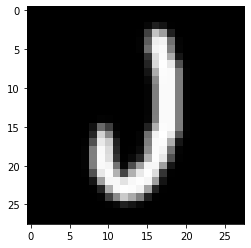

In [25]:
# Puedes usar esta celda para visualizar los caracteres

img_data = np.array(X_scaled)[100].reshape(28, 28).T
plt.imshow(img_data, cmap="gray")
plt.show()

- Realiza un escalamiento de los datos. Justifica la importancia de escalar los datos antes de entrenar modelos como SVM. Verifica las proporciones de los datos entre categorías para cada subconjunto.


In [8]:
# Separación de variables dependientes e independientes en entrenamiento y testeo

from sklearn.model_selection import train_test_split


caracteres_train, caracteres_test, labels_train, labels_test = train_test_split(X_scaled, y, test_size=0.1, shuffle=True, stratify=y, random_state=random_state )

In [ ]:
data = pd.DataFrame(labels_test)
data[1] = data["label"]
data.groupby(data["label"]).count()

,1
label,
0,241
1,242
2,242
3,241
4,241
5,242
6,241
7,241
8,241


In [ ]:
data = pd.DataFrame(labels_train)
data[1] = data["label"]
data.groupby(data["label"]).count()

,1
label,
0,2168
1,2176
2,2175
3,2169
4,2173
5,2175
6,2173
7,2168
8,2172


La proporción utilizada para train y test fue de 90/10, ya que es recomendado que el set de train sea mas extenso que el de test y la cantidad de datos permite que un 10% de ellos sea aun un buen volumen de información. 

La funcion utilizada de sklearn train_test_split con los parametros dados garantiza un balance proporcionado entre las clases. 

## Actividad 3:  Entrenamiento de modelo lineal

- Entrena un modelo lineal que identifique caracteres. Para eso, utiliza el módulo SVC de la librería sklean.svm. Visualiza los resultados de tu modelo mediane una matriz de confusión, e identifica las categorías más confundidas entre sí.

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import  classification_report

In [ ]:
# Modelo con kernel lineal

svm_lineal = SVC(kernel="linear")

# Entrenamiento

svm_lineal.fit(caracteres_train, labels_train)

# Predicción

predicted_lineal = svm_lineal.predict(caracteres_test)

svm_lineal.score(caracteres_test, labels_test)

0.7795556578795902

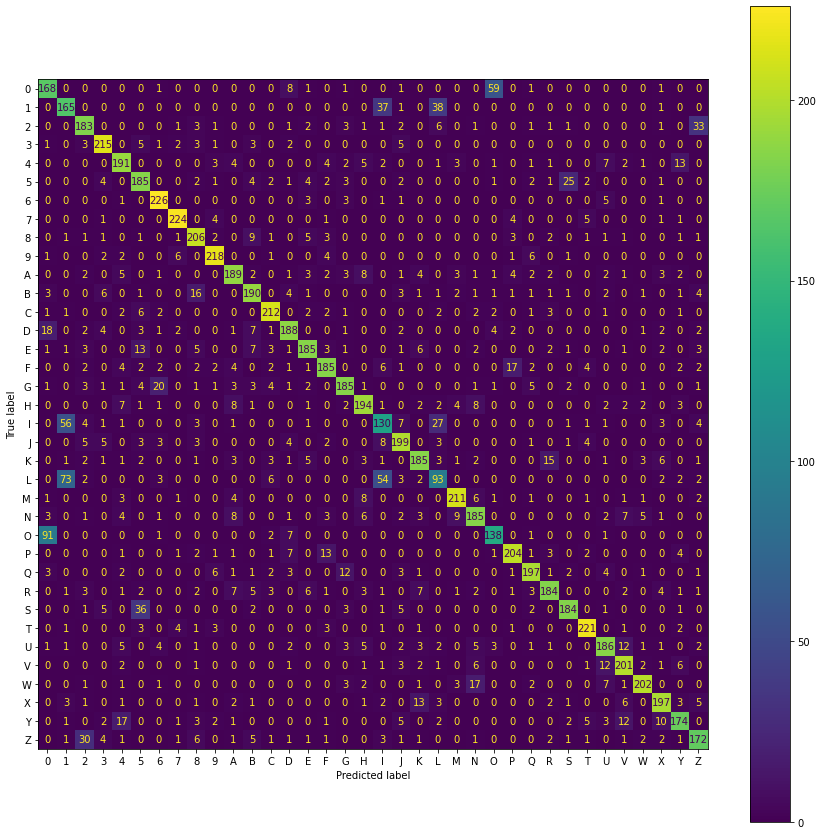

In [ ]:
# Matriz de confusión del modelo lineal
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

matriz_lineal = confusion_matrix(labels_test, predicted_lineal)

labels = svm_lineal.classes_ 

display = ConfusionMatrixDisplay(confusion_matrix=matriz_lineal, display_labels=labels)
display.plot()

fig = display.ax_.get_figure()
fig.set_figwidth(15)
fig.set_figheight(15)
fig.show()

Los caracteres mas confundidos entre ellos fueron el 0 con la O, el 1 con la I y la L, el 2 con la Z y el 5 con la S. 

Todos estos son caracteres que dependiendo como son escritos pueden parecer muy similarres entre si.

- Calcula el accuracy para el modelo lineal. Obtén además los puntajes de precission, recall y f1-score para cada uno de las categorías del modelo entrenado. Comente sobre el rendimiento del modelo en base a estos resultados y los de la matriz de confusi ́on, y formula una hipótesis que pueda explicar los resultados obtenidos. En tu explicación, se espera que incorpores las métricas solicitadas y demuestres un manejo de su significado.

Accuracy

In [ ]:
# Métricas del modelo lineal

svm_lineal.score(caracteres_test, labels_test)

0.7795556578795902

In [ ]:
from sklearn.metrics import  classification_report 

print(classification_report(labels_test, predicted_lineal))

              precision    recall  f1-score   support

           0       0.57      0.70      0.63       241
           1       0.54      0.68      0.60       242
           2       0.73      0.76      0.75       242
           3       0.85      0.89      0.87       241
           4       0.75      0.79      0.77       241
           5       0.69      0.76      0.73       242
           6       0.84      0.94      0.89       241
           7       0.92      0.93      0.92       241
           8       0.79      0.85      0.82       241
           9       0.89      0.90      0.90       242
           A       0.79      0.78      0.79       242
           B       0.79      0.79      0.79       242
           C       0.87      0.88      0.87       241
           D       0.80      0.78      0.79       241
           E       0.83      0.77      0.80       241
           F       0.80      0.77      0.79       241
           G       0.82      0.76      0.79       242
           H       0.82    

Recall positivos dentro de positivos

Precision positivos dentro de positivos asignados

En cuanto a presicion, se observa claramente una disminución del valor promedio en las clases que el algoritmo confunde mencionadas anteriormente. Por ejemplo la precision para el caracter 0 es de 0.57 ya que el clasificador asignó como 0s 91 caracteres que pertenecian a la clase o, lo que afectó la resicion para esta clase. Lo mismo se puede observar para el 1, la L y la I.

Esta confusión de caracteres se puede observar en recall score. Donde es mas notorio es para el caracter L, que posee un recall score de 0.38. Al observar la matriz es posible notar que de los 242 caracteres pertenecientes a la clase L, solo 93 fueron asignados como tales, mientras que 73 fueron asignados como 1 y 54 como I.

Con respecto al f1-score, la mayoría de los resultados son mayores a 0.6 a excepción de la clase L, que al poseer un mal presicion score y un mal recall score, en consecuencia su f1-score tambien se vio afectado.

En conclusión, el modelo lineal fue efectivo para distuinguir caracteres con caracteristicas no similares, pero fallo bastante a la hora de distinguir caracteres similares como el 0 y la O. En especial el svm lineal falló en reconocer el caracter L, teniendo todas sus metricas por debajo del 50%. Esto pudo ocurrir debido a que un SVM lineal no es capaz de realizar este tipo de distinciones y es necesario una separación en mas dimenciones.

## Actividad 4: Entrenamiento de modelo no lineal

- Investiga sobre el kernel RBF. Explica su funcionamiento en términos generales y las ventajas o desventajes que puede tener éste modelo en comparación con un kernel lineal.

- Entrena un modelo no lineal que identifique caracteres. Visualiza los resultados de tu modelo mediane una matriz de confusión, e identifica las categorías más confundidas entre sí.

In [ ]:
# Modelo con kernel no lineal 

svm_rbf = SVC(kernel="rbf", random_state=random_state)

# Entrenamiento

svm_rbf.fit(caracteres_train, labels_train)

# Predicción

predicted_rbf = svm_rbf.predict(caracteres_test)

svm_rbf.score(caracteres_test, labels_test)

0.8777483596178197

- Calcula el accuracy para el modelo no lineal. Obtén además los puntajes de precission, recall y f1-score para cada uno de las categorías del modelo entrenado. Comente sobre el rendimiento del modelo en base a estos resultados y los de la matriz de confusión, y formula una hipótesis que pueda explicar los resultados obtenidos. En tu explicación, se espera que incorpores las métricas solicitadas y demuestres un manejo de su significado.

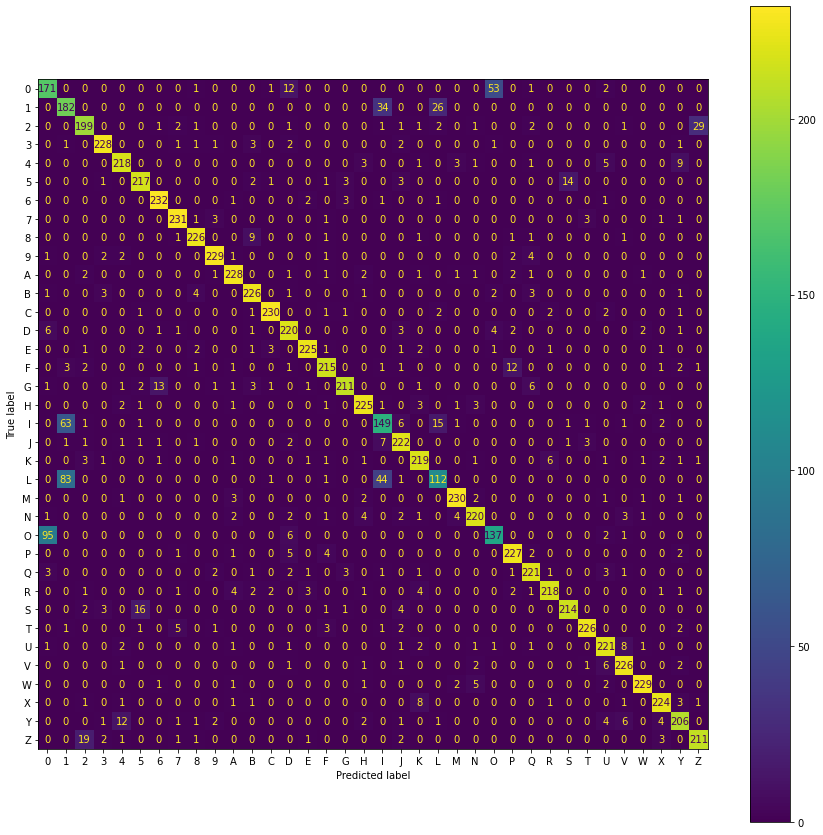

In [ ]:
# Matriz de confusión del modelo no lineal

matriz_rbf = confusion_matrix(labels_test, predicted_rbf)

labels = svm_rbf.classes_ 

display = ConfusionMatrixDisplay(confusion_matrix=matriz_rbf, display_labels=labels)
display.plot()

fig = display.ax_.get_figure()
fig.set_figwidth(15)
fig.set_figheight(15)
fig.show()

La matriz de confusión demuestra que el modelo rbf confunde los mismos caracteres que el modelo lineal. Estos son el 0 con la O, el 1 con la I y la L, el 2 con la Z y el 5 con la S. Estos errores se encuentran en menor cantidad que en el modelo lineal, sin embargo, la principal mejora del modelo rbf es lo poco que confundió el resto de las clases.

In [ ]:
# Métricas del modelo no lineal

print(classification_report(labels_test, predicted_rbf))

              precision    recall  f1-score   support

           0       0.61      0.71      0.66       241
           1       0.54      0.75      0.63       242
           2       0.86      0.82      0.84       242
           3       0.95      0.95      0.95       241
           4       0.90      0.90      0.90       241
           5       0.90      0.90      0.90       242
           6       0.93      0.96      0.95       241
           7       0.94      0.96      0.95       241
           8       0.94      0.94      0.94       241
           9       0.95      0.95      0.95       242
           A       0.92      0.94      0.93       242
           B       0.90      0.93      0.92       242
           C       0.96      0.95      0.96       241
           D       0.86      0.91      0.88       241
           E       0.96      0.93      0.95       241
           F       0.92      0.89      0.91       241
           G       0.95      0.87      0.91       242
           H       0.93    

Para la precision, recall score y en consecuencia el f1-score de las clases que no son las comunmente confundidas, los valores son cercanos o superiores a 0.9. Esto justifica el aumento en accuracy en comparación al modelo lineal. Además, para las clases comunmente confundidas, sus metricas nunca son menores a 0.5.

Lo anterior sugiere que el modelo rbf es capaz de hacer una mejor ditinción de caracteres, teniendo un muy buen accuracy para las clases no similares entre ellas y unas mejores metricas que el modelo lineal para las clases similares. 

## Actividad 5: Optimización del modelo


Investiga los siguientes hiperparámetros que pueden ajustarse para el entrenamiento de SVM:
- C
- Gamma

Detalla en tu respuesta qué hace cada uno de estos, en qué circunstancias pueden especificarse su valor, y cuales son los posibles efectos no deseados de utilizar valores extremos para ámbos hiperparámetros.

El hiperparametro C define la tolerancia del modelo a elementos mal clasificados. Un bajo mayor de C permite mas elementos mal clasificados, privilegiando las distancia entre el hiperplano y el vector de soporte, mientras que un valor alto genera menos elementos mal clasificados. El valor correcto a utilizar dependerá de los datos que se deseen predecir. 

Por otro lado el valor gamma define la curvatura del hiperplano. Un alto valorde gamma define un hiperplano con mas curvatura y un bajo valor de gamma define un hiperplano con menor curvatura. La decisión de que valor utilizar dependerá de la forma en que están distribuidos los datos y la forma que sea necesaria para que el hiperplano separe las clases correctamente.

- Investiga sobre el m ́etodo de cross validation. Explica brevemente en qu ́e consiste, y cuál es su utilidad en la validación de un modelo entrenado.

El metodo de crossvalidation consiste en utilizar porciones de el dataset de entrenamiento para en diferentes iteraciones probar su efectividad y capacidad de generalización, para asi tener una aproximación de como se comportará el clasificador en frente de un set de datos externo.

- Investiga y explica brevemente en qué consiste la optimización de hiperparámetros en base a Grid Search, e indica el rol de cross validation en este método.

Grid search consiste en probar un algoritmo de clasificación con diferentes sets de hiperparametros, para comprobar cual set de hiperparametros entrega un mejor resultado y devolver este algoritmo entrenado. Para esto es necesario entregarle a grid search el set de hiperparametros a utilizar.  


- Ejecuta una optimización en grid search en base al conjunto de hiperparámetros que consideres conveniente. Evalúa el modelo obtenido en el set de testeo, y grafica la matriz de confusión.


Debido al tiempo de ejecución del metodo GridSearch, primero se utilizó la busqueda de parametros con un maximo de iteraciones, para luego entrenar un SVM con los mejores parametros encontrados.

In [ ]:
# Iteración de hiperparámetros con Grid Search

from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 5, 10], 'gamma':[0.01, 0.1, 0.2]}

svc = SVC(max_iter=5)

grid_search = GridSearchCV(svc, parameters)

grid_search.fit(caracteres_train, labels_train)


In [13]:
predicted_grid = grid_search.predict(caracteres_test)

In [19]:
grid_search.score(caracteres_test, labels_test)

0.45930701047542305

In [17]:
grid_search.cv_results_

{'mean_fit_time': array([17.35921435, 20.21776333, 17.06786904, 19.33500605, 17.21541295,
        19.91263843, 16.98468776, 18.68314877, 15.46552606, 16.82828302,
        15.49740586, 18.22955503, 15.12791543, 17.62697897, 16.59300499,
        18.26830783, 16.21417871, 18.55024676]),
 'std_fit_time': array([0.54370359, 1.36190694, 0.30523379, 0.25794874, 0.23549336,
        0.29934336, 0.87680148, 0.88407453, 0.34895707, 0.95654932,
        0.34883473, 0.35822633, 0.34753622, 0.81157466, 0.81165425,
        0.11994545, 0.30683643, 0.2533595 ]),
 'mean_score_time': array([46.7578033 , 66.31053143, 45.59684548, 67.4952527 , 46.07344975,
        67.60739336, 45.31227059, 63.66235867, 40.69087071, 63.62232966,
        41.95444956, 65.91668835, 40.25229797, 62.95168815, 44.55254116,
        66.56917324, 42.92730803, 67.34651833]),
 'std_score_time': array([1.18627616, 0.521991  , 0.24307938, 0.54587552, 0.52761035,
        0.74306534, 1.15213198, 1.30256389, 1.43338978, 1.12190645,
        

In [20]:
grid_search.best_params_

{'C': 5, 'gamma': 0.01, 'kernel': 'rbf'}

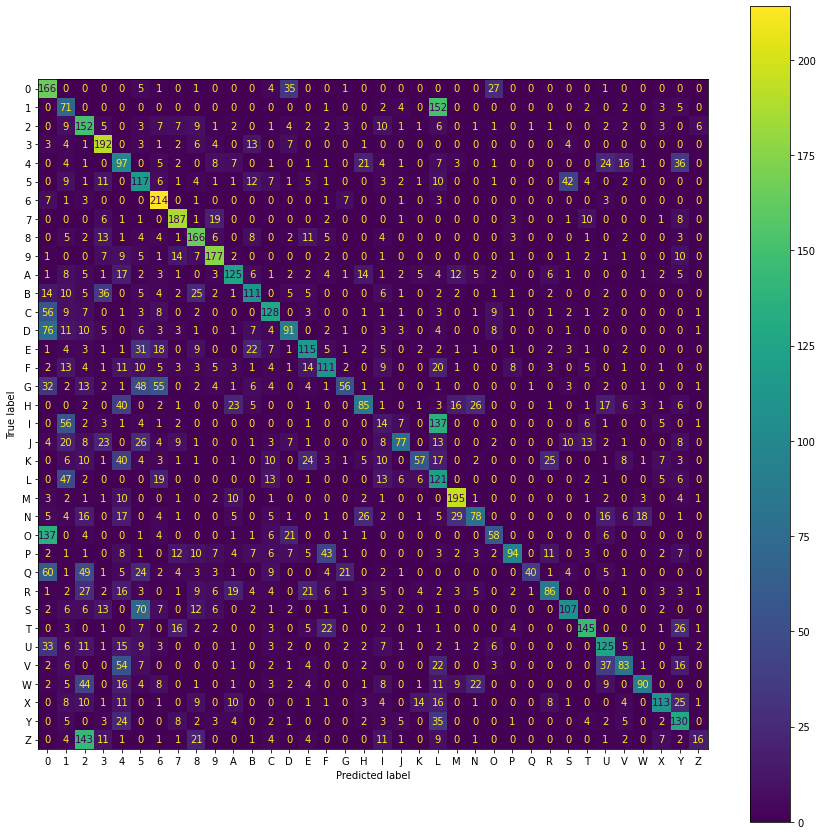

In [15]:
# Matriz de confusión del modelo optimizado

matriz_grid = confusion_matrix(labels_test, predicted_grid)

labels = grid_search.classes_

display = ConfusionMatrixDisplay(confusion_matrix=matriz_grid, display_labels=labels)
display.plot()

fig = display.ax_.get_figure()
fig.set_figwidth(15)
fig.set_figheight(15)
fig.show()

- Reporta el accuracy obtenido, y el precision, recall y f1-score para cada categoría. Compara los resultados con los obtenidos para los otros modelos.


In [16]:
# Métricas del modelo optimizado

print(classification_report(labels_test, predicted_grid))

              precision    recall  f1-score   support

           0       0.27      0.69      0.39       241
           1       0.21      0.29      0.24       242
           2       0.28      0.63      0.39       242
           3       0.56      0.80      0.66       241
           4       0.24      0.40      0.30       241
           5       0.29      0.48      0.36       242
           6       0.54      0.89      0.67       241
           7       0.67      0.78      0.72       241
           8       0.54      0.69      0.60       241
           9       0.68      0.73      0.71       242
           A       0.56      0.52      0.54       242
           B       0.54      0.46      0.49       242
           C       0.54      0.53      0.54       241
           D       0.47      0.38      0.42       241
           E       0.49      0.48      0.48       241
           F       0.51      0.46      0.48       241
           G       0.56      0.23      0.33       242
           H       0.49    

In [ ]:
# SVM con los mejores hiperparámetros

svm_best = SVC(kernel="rbf", random_state=random_state, C= 5, gamma= 0.01)

# Entrenamiento

svm_best.fit(caracteres_train, labels_train)



In [22]:
# Predicción

predicted_best = svm_best.predict(caracteres_test)

svm_best.score(caracteres_test, labels_test)

0.8854610337285599

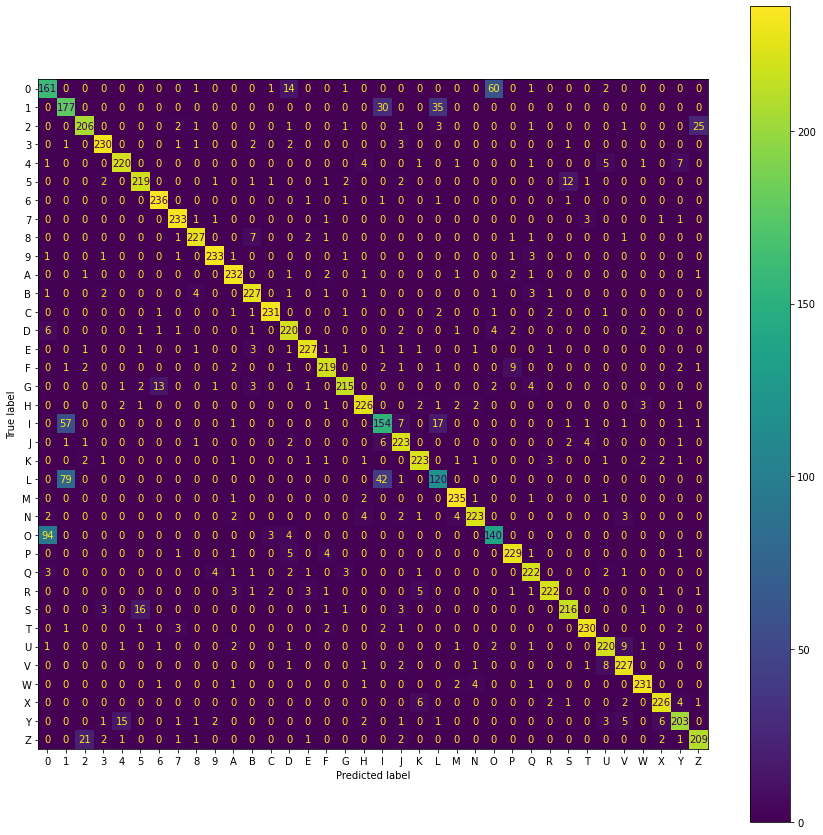

In [23]:
# Matriz de confusión con los mejores hiperparametros

matriz_best = confusion_matrix(labels_test, predicted_best)

labels = svm_best.classes_

display = ConfusionMatrixDisplay(confusion_matrix=matriz_best, display_labels=labels)
display.plot()

fig = display.ax_.get_figure()
fig.set_figwidth(15)
fig.set_figheight(15)
fig.show()

In [24]:
# Metricas de los mejores hiperparámetros

print(classification_report(labels_test, predicted_best))

              precision    recall  f1-score   support

           0       0.60      0.67      0.63       241
           1       0.56      0.73      0.63       242
           2       0.88      0.85      0.87       242
           3       0.95      0.95      0.95       241
           4       0.92      0.91      0.91       241
           5       0.91      0.90      0.91       242
           6       0.93      0.98      0.96       241
           7       0.95      0.97      0.96       241
           8       0.95      0.94      0.95       241
           9       0.96      0.96      0.96       242
           A       0.93      0.96      0.95       242
           B       0.92      0.94      0.93       242
           C       0.97      0.96      0.96       241
           D       0.86      0.91      0.89       241
           E       0.96      0.94      0.95       241
           F       0.93      0.91      0.92       241
           G       0.95      0.89      0.92       242
           H       0.93    

Los resultados para las tres metricas son muy similares a los obtenidos con rbf. Los caracteres con caracteristicas similares como el 0 y la O aun son confundidos pero en menor cantidad que en el modelo lineal. Esto sugiere que este tipo de datos no son separables linealmente. 

- En base a los resultados obtenidos con el modelo optimizado, comenta brevemente sobre las principales virtudes y limitaciones del SVM en el contexto de visi ́on por computador. En tu respuesta, procura aludir a las categorías con mejor y con peor desempe ̃no bajo las m ́etricas estudiadas. Por último, comenta sobre métodos adicionales a los vistos en esta tarea que podr ́ıan mejorar el rendimiento de SVM en el contexto del reconocimiento de caracteres.

La principal limitación de SVM se observa en la dificultad de distinguir clases similares como el 0 y la O o el 1 la L y la I. En cambio, para las clases con caracteristicas mas significativas, al utilizar modelos no lineales estas son reconocidas en la mayoría de los casos. 

Finalmente, la utilización de Grid Search sin limitaciones de tiempo y recursos puede ser una muy buena manera de mejorar el reconocimiento de caracteres, ya que si es probado con muchas combinaciones de hiperparametros, es muy posible conseguir un modelo con mejor accuracy.